# Mini-project Task 1: Basic component






# Problem Formulation and data import:

The aim of this task is to build a classification model to classify indoor/outdoor audio labels from the raw audio files. 

In [6]:
#importing necessary modules to import the audio files into python
from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os, sys, re, pickle, glob
import urllib.request
import zipfile

import IPython.display as ipd
from tqdm import tqdm
import librosa

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The path for the audio files are stored in the following variables. Since the audio files belong to 5 different folders, it consists of 5 path variables. 

In [2]:
path_1 = '/content/drive/MyDrive/Data/MLEndLS/sample/MLEndLS_1/*.wav'
path_2 =  '/content/drive/MyDrive/Data/MLEndLS/sample/MLEndLS_2/*.wav'
path_3 =  '/content/drive/MyDrive/Data/MLEndLS/sample/MLEndLS_3/*.wav'
path_4 = '/content/drive/MyDrive/Data/MLEndLS/sample/MLEndLS_4/*.wav'
path_5 =  '/content/drive/MyDrive/Data/MLEndLS/sample/MLEndLS_5/*.wav'

In [3]:
#importing the files from the path variables into a list using glob()
files_1 = glob.glob(path_1)
files_2 = glob.glob(path_2)
files_3 = glob.glob(path_3)
files_4 = glob.glob(path_4)
files_5 = glob.glob(path_5)

In [4]:
files_all = files_1 + files_2 + files_3 + files_4 + files_5
len(files_all),type(files_all)

(2498, list)

The glob module or the function glob.glob() in general assists in retrieving files from a directory recursively as shown above. The number of files are 2,498 and are saved in a list. 

In [5]:
#this loop helps us listen to the audio in the python kernel using ipd.Audio
for _ in range(3):
  n = np.random.randint(450)
  display(ipd.Audio(files_all[n]))


As the files are extracted onto a list of audio signals, we can go on to map the file id with the metadata available. 

The data at hand is a collection of recordings described by 5 attributes, namely: Area, Spot, in_out, participant. The 'in_out' column would be the potential label of the classification model since the premise of this task is to classify if the files have been recorded in a location that is indoors or outdoors. 

In [7]:
#importing the metadata into pandas dataframe
MLEndLS_df = pd.read_csv('/content/MLEndLS.csv').set_index('file_id')
MLEndLS_df

area       spot   in_out Participant
file_id                                             
0001.wav     british     street  outdoor        S151
0002.wav  kensington   dinosaur   indoor        S127
0003.wav      campus     square  outdoor         S18
0004.wav  kensington     hintze   indoor        S179
0005.wav      campus     square  outdoor        S176
...              ...        ...      ...         ...
2496.wav     westend  trafalgar  outdoor        S151
2497.wav      campus     square  outdoor          S6
2498.wav     westend   national   indoor         S96
2499.wav     british     room12   indoor         S73
2500.wav     british     room12   indoor         S58

[2500 rows x 4 columns]

In [9]:
#to check if the file ids match the format mentioned in the dataframe above
for file in files_all:
  print(file.split('/')[-1])

0026.wav
0047.wav
0042.wav
0007.wav
0009.wav
0059.wav
0020.wav
0002.wav
0031.wav
0045.wav
0055.wav
0027.wav
0041.wav
0010.wav
0037.wav
0032.wav
0023.wav
0028.wav
0022.wav
0062.wav
0054.wav
0005.wav
0015.wav
0006.wav
0025.wav
0058.wav
0048.wav
0051.wav
0019.wav
0014.wav
0061.wav
0040.wav
0018.wav
0063.wav
0044.wav
0016.wav
0004.wav
0024.wav
0017.wav
0057.wav
0029.wav
0021.wav
0008.wav
0039.wav
0053.wav
0052.wav
0036.wav
0001.wav
0060.wav
0043.wav
0050.wav
0049.wav
0030.wav
0038.wav
0013.wav
0046.wav
0003.wav
0034.wav
0035.wav
0011.wav
0012.wav
0056.wav
0201.wav
0119.wav
0079.wav
0265.wav
0140.wav
0074.wav
0224.wav
0225.wav
0129.wav
0110.wav
0263.wav
0084.wav
0242.wav
0168.wav
0237.wav
0148.wav
0123.wav
0124.wav
0239.wav
0155.wav
0125.wav
0126.wav
0236.wav
0128.wav
0261.wav
0072.wav
0202.wav
0152.wav
0251.wav
0069.wav
0212.wav
0213.wav
0199.wav
0106.wav
0222.wav
0175.wav
0240.wav
0160.wav
0101.wav
0132.wav
0247.wav
0177.wav
0167.wav
0120.wav
0245.wav
0186.wav
0102.wav
0082.wav
0150.wav
0

The iteration above displays a list of files within a range that consist of extentions just as those mentioned in the metadata dataframe. Consequently proving that we can extract the acoustic features from the list of audio files and use the metadata to build a supervised classification model.

In [ ]:
MLEndLS_df.loc[MLEndLS_df['file_id']=='0033.wav']

file_id        area  spot   in_out Participant
32  0033.wav  kensington  pond  outdoor        S102

In [ ]:
MLEndLS_df.loc[MLEndLS_df['file_id']=='2206.wav']

file_id    area    spot   in_out Participant
2205  2206.wav  campus  square  outdoor        S102

In [ ]:
MLEndLS_df.set_index('file_id',inplace = True)
MLEndLS_df

area       spot   in_out Participant
file_id                                             
0001.wav     british     street  outdoor        S151
0002.wav  kensington   dinosaur   indoor        S127
0003.wav      campus     square  outdoor         S18
0004.wav  kensington     hintze   indoor        S179
0005.wav      campus     square  outdoor        S176
...              ...        ...      ...         ...
2496.wav     westend  trafalgar  outdoor        S151
2497.wav      campus     square  outdoor          S6
2498.wav     westend   national   indoor         S96
2499.wav     british     room12   indoor         S73
2500.wav     british     room12   indoor         S58

[2500 rows x 4 columns]

In [ ]:
MLEndLS_df.loc['2200.wav':'2206.wav',:]

area       spot   in_out Participant
file_id                                          
2200.wav  british     square  outdoor        S185
2201.wav   campus     square  outdoor         S81
2202.wav   campus      canal  outdoor         S76
2203.wav   campus     square  outdoor        S174
2204.wav   campus  reception   indoor         S69
2205.wav   campus      curve   indoor         S13
2206.wav   campus     square  outdoor        S102

# Transformation 

As we already know that audio files are complex, it is highly dimensional, "each audio frame is a data record that contains the samples for all of the channels available in an audio signal". As audio signals are recorded using digital devices it consists of a time-series upon the amplitude of the sound wave. A sample of an audio wave is described as that captured moment in a sound wave which can then be collectively viewed together as a series of samples representing the original audio signal. 

The librosa module assists in analysing and extracting the sound features of an audio signal. 

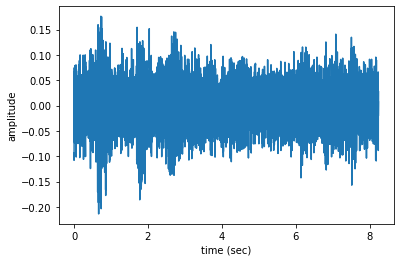

In [8]:
#to plot the audio signals 
n = 53
fs = None 
x, fs = librosa.load(files_all[n], sr = fs )
t = np.arange(len(x))/fs
plt.plot(t,x)
plt.xlabel('time (sec)')
plt.ylabel('amplitude')
plt.show()
display(ipd.Audio(files_all[n]))

In [10]:
MLEndLS_df.loc[files_all[53].split('/')[-1]]

area           southbank
spot                book
in_out           outdoor
Participant         S126
Name: 0038.wav, dtype: object

The audio signal extracted from files_all above shows an example of a collection of samples plotted collectively to display an original audio signal. The n = 53 used in the loop is then used to display the information of this audio signal from the dataframe. 

We can see that by using the audio from the index we are informed of the area, spot, participant and its in_out feature. 

We can calculate the number of samples this audio has by using the very same librosa function, which subsequently uses the sample rate to extract the length of the original sample.

In [11]:
n=53
x, fs = librosa.load(files_all[n],sr=fs)
print('This audio signal has', len(x), 'samples')

This audio signal has 363384 samples


The number of samples are 363384. It is quite evident that these many number of samples exhibit high dimensionality, proving that the number of parameters must be higher than number of samples to train our model. 

Hence, we extract the features power, pitch_mean, pitch_standard deviation, and the fraction of the voiced region by a function.  

In [12]:
def getPitch(x,fs,winLen=0.02):
  #winLen = 0.02 
  p = winLen*fs
  frame_length = int(2**int(p-1).bit_length())
  hop_length = frame_length//2
  f0, voiced_flag, voiced_probs = librosa.pyin(y=x, fmin=80, fmax=450, sr=fs,
                                                 frame_length=frame_length,hop_length=hop_length)
  return f0,voiced_flag

In [13]:
def getXy(files,labels_file, scale_audio=False, onlySingleDigit=False):
  X,y =[],[]
  for file in tqdm(files):
    fileID = file.split('/')[-1]
    file_name = file.split('/')[-1]
    yi = labels_file.loc[fileID]['in_out']=='indoor'

    fs = None # if None, fs would be 22050
    x, fs = librosa.load(file,sr=fs)
    if scale_audio: x = x/np.max(np.abs(x))
    f0, voiced_flag = getPitch(x,fs,winLen=0.02)
      
    power = np.sum(x**2)/len(x)
    pitch_mean = np.nanmean(f0) if np.mean(np.isnan(f0))<1 else 0
    pitch_std  = np.nanstd(f0) if np.mean(np.isnan(f0))<1 else 0
    voiced_fr = np.mean(voiced_flag)
    

    xi = [power,pitch_mean,pitch_std,voiced_fr]
    X.append(xi)
    y.append(yi)

  return np.array(X),np.array(y)

In [ ]:
X,y = getXy(files_all, labels_file=MLEndLS_df, scale_audio=True, onlySingleDigit=True)

100%|██████████| 2498/2498 [1:10:21<00:00,  1.69s/it]


The features extracted from using the functions can be stored in a dataframe.

In [14]:
df = pd.read_csv('X_and_y.csv')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

X = np.column_stack([df.Power,df.Pitch_mean,df.Pitch_stdev,df.Fraction_region])
y = df.label

In [15]:
print('The shape of X is', X.shape) 
print('The shape of y is', y.shape)


The shape of X is (2498, 4)
The shape of y is (2498,)


In [16]:
print(' The number of indoor recordings is ', np.count_nonzero(y))
print(' The number of outdoor recordings is ', y.size - np.count_nonzero(y))

 The number of indoor recordings is  1181
 The number of outdoor recordings is  1317


In [17]:
#to view the design matrix for the features extracted
print(X[:5])

[[9.66975689e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.29284189e-02 1.27115114e+02 1.63744189e+01 9.15915916e-02]
 [5.34790698e-03 2.05667512e+02 9.53106524e+01 1.15841584e-01]
 [7.56088930e-03 1.21093099e+02 2.64785124e+01 8.78787879e-02]
 [7.26119064e-03 2.39874270e+02 4.74032835e+01 9.61038961e-02]]


# Machine Learning pipeline

This pipeline consists of splitting the dataset into 70%- training set and a 30% of test set. This is done so to first train the model using the right parameters. Furthermore, by using the training set a grid search cross validation is to be performed to tune the hyperparameters of a Random Forest Classifier. The best hyper parameters obtained are then specifically used to fit the training dataset onto the model and then predict the accuracy of the test set

By extracting the features into X and y arrays we can build a model for the classification. 

# Methodology 

The models used in this classification project is Random Forest classifier. Although KNN classifier has been tested at an earlier stage, since the features extracted are complex, Random Forest Classifier is used.  

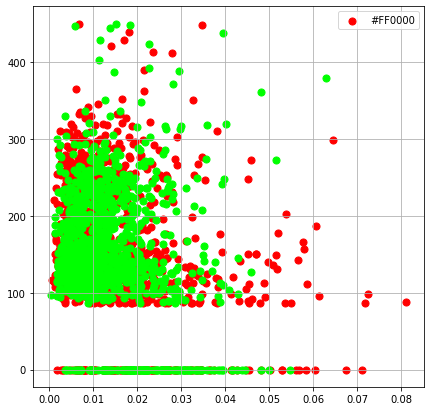

In [20]:
plt.figure(figsize=(7, 7))

scatter = plt.scatter(X[y==0,0], X[y==0,1], s=50 , color= '#FF0000' )
scatter = plt.scatter(X[y==1,0], X[y==1,1], s=50 , color= '#00FF00') 

plt.legend()
plt.grid(True)
plt.show()

The scatter plot distribution shows an indistinguishable result. It is evident that majority of the data points in the dataset overlap. However, we could create a model to predict the labels to check if the model caters to the data input. 

In [27]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#splitting the dataset into train and test with a test size of 30% of the initial data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 43)

The data split using train test split is done so where the training data of 70% will be used to train the model using cross validation while the remaining 30% would serve as our ultimate test set. 

Minimum error:- 0.432 at K = 12


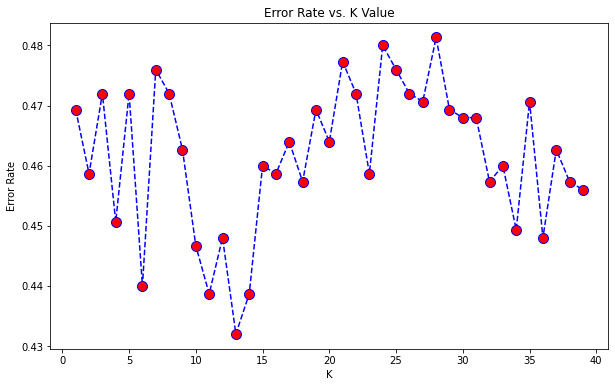

In [22]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    y_predi = knn.predict(X_test)
    error_rate.append(np.mean(y_predi != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))


The minimum error rate is shown to be of 43.2% while using a knn model with a neighbours = 12. Although the error rate is at its minimum, a model with such an error may not render the right results we require.

# Modelling

Ensembles are methods that combine multiple models to create powerful ones. Random Forests are one of those models that address and rectify the drawbacks we may face while using models like Decision Trees. 

It consists of the n_estimator parameter that decides on the number of decision trees required, the max_depth parameter and minimum sample split. These parameters assist in determining the right model for the data input. 

As a first step before we create a model is to scale the data, just so the model predicts the features in an equal footing. 


In [23]:
#function to scale the data 
def scale_data(data):
    '''function to scale the features using min-max normalisaton 
    into a range of 1 to 10 '''
    data = (((data - data.min())/(data.max() - data.min())) * 9)+ 1
    return data


In [24]:
#using the training and testing data set used above 
X_train_df = pd.DataFrame(X_train, columns = ['Power','Pitch_mean','Pitch_stdev','Fraction_region'])
X_test_df = pd.DataFrame(X_test, columns = ['Power','Pitch_mean','Pitch_stdev','Fraction_region'])

#scale the data
X_train_df = scale_data(X_train_df)
X_test_df = scale_data(X_test_df)

#convert it back to a design matrix
X_train = np.column_stack([X_train_df.Power, X_train_df.Pitch_mean, X_train_df.Pitch_stdev,
                          X_train_df.Fraction_region])
X_test = np.column_stack([X_test_df.Power, X_test_df.Pitch_mean, X_test_df.Pitch_stdev,
                          X_test_df.Fraction_region])

In [28]:
#instantiate the random forest classifier 
forest = RandomForestClassifier()

We can implement a simple grid search cross validation for the model to perform its validation over a list of parameters. This step can be viewed as a hyperparameter tuning step to select the right parameter for the model. 

It assists in choosing the right hyperparameter that possibly would not cause the problems of overfitting or underfitting the validation dataset.

In [30]:
from sklearn.model_selection import GridSearchCV

#list of hyperparameters to loop through 
n_estimators = [3, 10, 20, 50, 100]
max_depth = range(1,15,3)
min_samples_split = [2, 5, 10, 15, 50]

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split)

gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
#fitting the best parameter to obtain the accuracy over test
#and training dataset
bestF = gridF.fit(X_train, y_train)

print("Best training score : ",bestF.score(X_train,y_train))


Fitting 3 folds for each of 125 candidates, totalling 375 fits
Best training score :  0.9302059496567505


In [31]:
print("The best hyperparameters to train the model with are: {} ".format(gridF.best_params_))

The best hyperparameters to train the model with are: {'max_depth': 13, 'min_samples_split': 5, 'n_estimators': 20} 


In [35]:
grid_search_results = pd.DataFrame(gridF.cv_results_)
display(grid_search_results)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         0.013475      0.006140         0.002560        0.001102   
1         0.025770      0.000223         0.003431        0.000058   
2         0.050630      0.001099         0.005286        0.000277   
3         0.126599      0.002430         0.011925        0.000101   
4         0.309715      0.046581         0.024650        0.003828   
..             ...           ...              ...             ...   
120       0.014131      0.001868         0.001850        0.000028   
121       0.039306      0.000292         0.003609        0.000155   
122       0.077458      0.003499         0.006118        0.000274   
123       0.199243      0.004732         0.013843        0.000528   
124       0.387709      0.010501         0.031575        0.005471   

    param_max_depth param_min_samples_split param_n_estimators  \
0                 1                       2                  3   
1                 1                       2                 10   
2                 1                       2                 20   
3                 1                       2                 50   
4                 1                       2                100   
..              ...                     ...                ...   
120              13                      50                  3   
121              13                      50                 10   
122              13                      50                 20   
123              13                      50                 50   
124              13                      50                100   

                                                params  split0_test_score  \
0    {'max_depth': 1, 'min_samples_split': 2, 'n_es...           0.528302   
1    {'max_depth': 1, 'min_samples_split': 2, 'n_es...           0.521441   
2    {'max_depth': 1, 'min_samples_split': 2, 'n_es...           0.531732   
3    {'max_depth': 1, 'min_samples_split': 2, 'n_es...           0.523156   
4    {'max_depth': 1, 'min_samples_split': 2, 'n_es...           0.516295   
..                                                 ...                ...   
120  {'max_depth': 13, 'min_samples_split': 50, 'n_...           0.512864   
121  {'max_depth': 13, 'min_samples_split': 50, 'n_...           0.554031   
122  {'max_depth': 13, 'min_samples_split': 50, 'n_...           0.564322   
123  {'max_depth': 13, 'min_samples_split': 50, 'n_...           0.536878   
124  {'max_depth': 13, 'min_samples_split': 50, 'n_...           0.555746   

     split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0             0.518010           0.510309         0.518874        0.007371   
1             0.533448           0.525773         0.526887        0.004965   
2             0.547170           0.517182         0.532028        0.012244   
3             0.540309           0.513746         0.525737        0.010997   
4             0.528302           0.527491         0.524029        0.005479   
..                 ...                ...              ...             ...   
120           0.530017           0.517182         0.520021        0.007285   
121           0.519726           0.561856         0.545204        0.018297   
122           0.528302           0.568729         0.553784        0.018108   
123           0.524871           0.565292         0.542347        0.016949   
124           0.547170           0.553265         0.552060        0.003603   

     rank_test_score  
0                119  
1                 91  
2                 80  
3                 98  
4                103  
..               ...  
120              117  
121               26  
122                2  
123               43  
124                6  

[125 rows x 14 columns]

# Testing 



From the grid search cross validation applied to the model, we have obtained a training accuracy of 93.02%. However, using the best parameters mentioned can be used to check the test accuracy. 

This is done to train the model **only** with the best parameters.

As we had already split the dataset into 70% training and 30% test, the grid search cross validation had performed its analysis on the training dataset only. It split the dataset into 3 and treated. 

Hence, the remaining 30% of the original dataset is used to test the model using the best parameters.

In [32]:
forest_F= RandomForestClassifier(n_estimators=100,max_depth = 7,
                               min_samples_split= 5,random_state=2)
forest_fit= forest_F.fit(X_train,y_train)
print("The test accuracy obtained for the model built is: {}".format(forest_fit.score(X_test,y_test)))

The test accuracy obtained for the model built is: 0.5613333333333334


In [36]:
from sklearn.metrics import confusion_matrix
y_pred = forest_F.predict(X_test)

confusion2 = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n{}".format(confusion2))


Confusion matrix:
[[234 178]
 [151 187]]


## Conclusion

The test accuracy obtained is of 56.13% after hyperparamter tuning the classifier. This result however, supports the minimum error rate of 43.2% obtained using K-nearest neighbour classification. Had we used KNN, the possibility of obtaining a better accuracy may not have been the case. 

The confusion matrix displays the true negative. false negative, true positive and false positive predictions by the model. 

This does not have to mean that the model is necessarily irreparable. It follows the underlying rule of catering to the dataset. The features extracted from the audio signals are only 4, consequently, this could lead to the possibility of diving deep and extracting further features from the signals. As we had seen initially in the scatter plot visualisation, the data is indistinguishable. 

